## 1. Binance API Data Fetching

In [1]:
# Cell 1: Install dependencies (run once)
%pip install python-binance pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [10]:
from binance.client import Client
import pandas as pd

client = Client()

# Fetch data
bnb_data = client.get_historical_klines(
    symbol="BNBUSDT",
    interval=Client.KLINE_INTERVAL_1DAY,
    start_str="2024-01-01"
)

# Convert to DataFrame with proper typing
columns = [
    'Open Time', 'Open', 'High', 'Low', 'Close', 'Volume',
    'Close Time', 'Quote Volume', 'Trades', 'TB Base Volume',
    'TB Quote Volume', 'Ignore'
]

df = pd.DataFrame(bnb_data, columns=columns)

# Convert numeric columns from string to float
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Volume']
df[numeric_cols] = df[numeric_cols].astype(float)

# Convert timestamps
df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
df['Close Time'] = pd.to_datetime(df['Close Time'], unit='ms')

# Verify
print(df.dtypes)

Open Time          datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume                    float64
Close Time         datetime64[ns]
Quote Volume              float64
Trades                      int64
TB Base Volume             object
TB Quote Volume            object
Ignore                     object
dtype: object


### 2. Advanced Metrics (Showcasing Competence)

In [12]:
# Calculate volatility safely
try:
    df['Daily Volatility'] = ((df['High'] - df['Low']) / df['Low']) * 100
except Exception as e:
    print(f"Volatility calculation error: {e}")
    df['Daily Volatility'] = None  # Fallback

# Volume-Weighted Average Price (VWAP)
try:
    df['VWAP'] = (df['Close'] * df['Volume']).cumsum() / df['Volume'].cumsum()
except:
    df['VWAP'] = None

# Save cleaned data
df.to_csv('../data/processed/bnb_cleaned.csv', index=False)

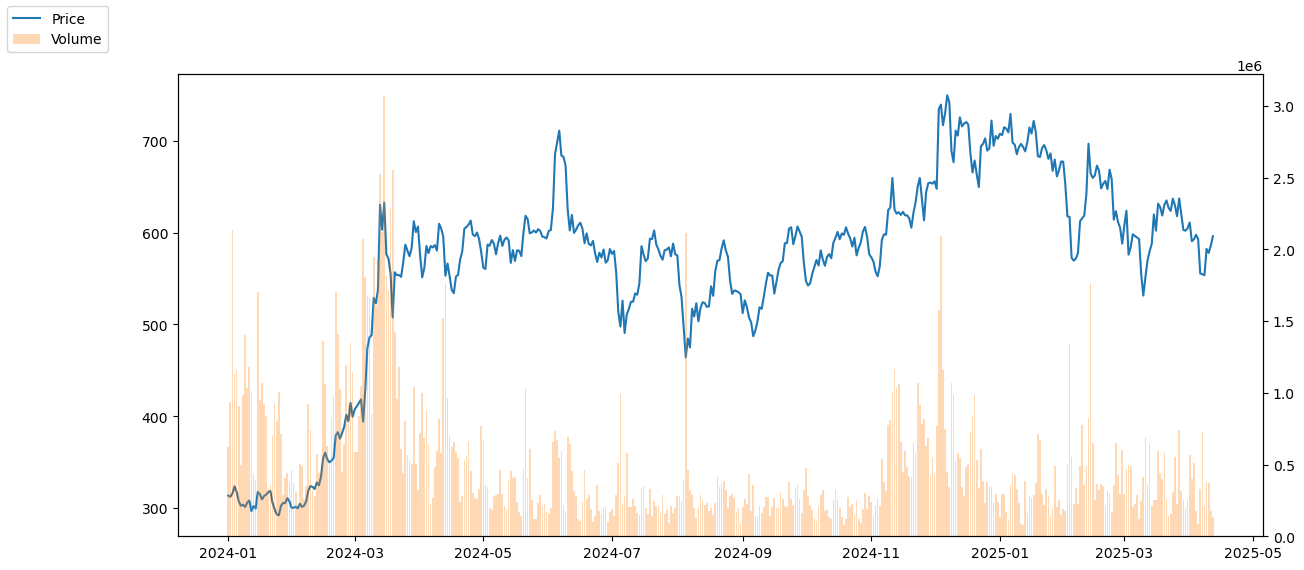

In [13]:
import matplotlib.pyplot as plt

# Dual-axis Price vs. Volume
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(df['Open Time'], df['Close'], color='tab:blue', label='Price')
ax2 = ax1.twinx()
ax2.bar(df['Open Time'], df['Volume'], color='tab:orange', alpha=0.3, label='Volume')
fig.legend(loc='upper left')
plt.savefig('../data/processed/price_volume.png', dpi=300)